In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1D Input

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5412 - loss: 295.4154 - val_accuracy: 0.4833 - val_loss: 182.5872
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 606ms/step - accuracy: 0.5731 - loss: 177.4242 - val_accuracy: 0.4833 - val_loss: 168.9629
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 594ms/step - accuracy: 0.5460 - loss: 92.0991 - val_accuracy: 0.4833 - val_loss: 40.1380
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5711 - loss: 31.1261 - val_accuracy: 0.6833 - val_loss: 6.1280
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8200 - loss: 6.3304 - val_accuracy: 0.7333 - val_loss: 5.4160
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 765ms/step - accuracy: 0.7557 - loss: 10.6094 - val_accuracy: 0.8000 - val_loss: 3.1686
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step - accuracy: 0.9029 - loss: 1.3378 - val_accuracy: 0.8000 - val_loss: 3.6618
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 595ms/step - accuracy: 0.9167 - loss: 1.6896 - val_accuracy: 0.4833 - val_l

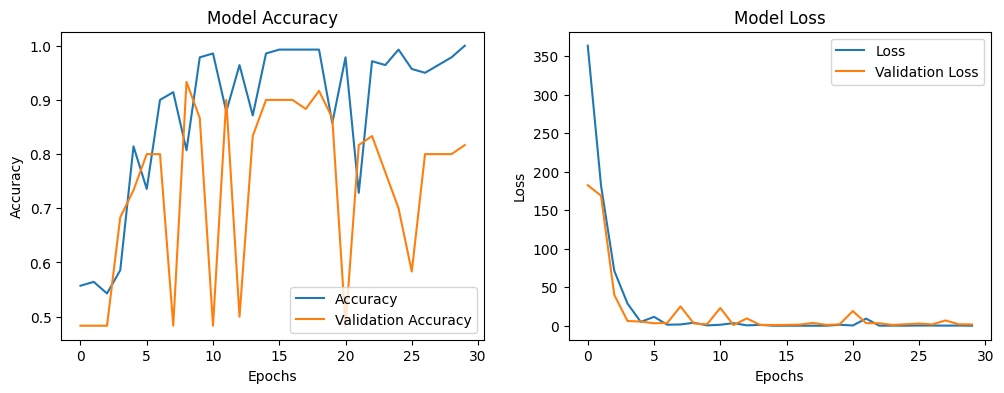

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'

# Load data
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Healthy (Z)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizure (S)

# Combine data and labels
if data_Z.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_Z, data_S), axis=0)
    labels_all = np.concatenate((labels_Z, labels_S), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


with stranderscaler

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5241 - loss: 2.3435 - val_accuracy: 0.5000 - val_loss: 0.5538
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 608ms/step - accuracy: 0.8664 - loss: 0.2983 - val_accuracy: 0.9333 - val_loss: 0.2179
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8057 - loss: 0.4937 - val_accuracy: 1.0000 - val_loss: 0.1513
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 668ms/step - accuracy: 0.9696 - loss: 0.1375 - val_accuracy: 0.9500 - val_loss: 0.1240
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 584ms/step - accuracy: 0.9920 - loss: 0.0818 - val_accuracy: 0.9667 - val_loss: 0.0755
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 605ms/step - accuracy: 0.9868 - loss: 0.0510 - val_accuracy: 0.9667 - val_loss: 0.0560
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 985ms/step - accuracy: 0.9939 - loss: 0.0322 - val_accuracy: 0.8333 - val_loss: 0.3429
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 598ms/step - accuracy: 0.8198 - loss: 0.4562 - val_accuracy: 0.9833 - val_loss: 0.071

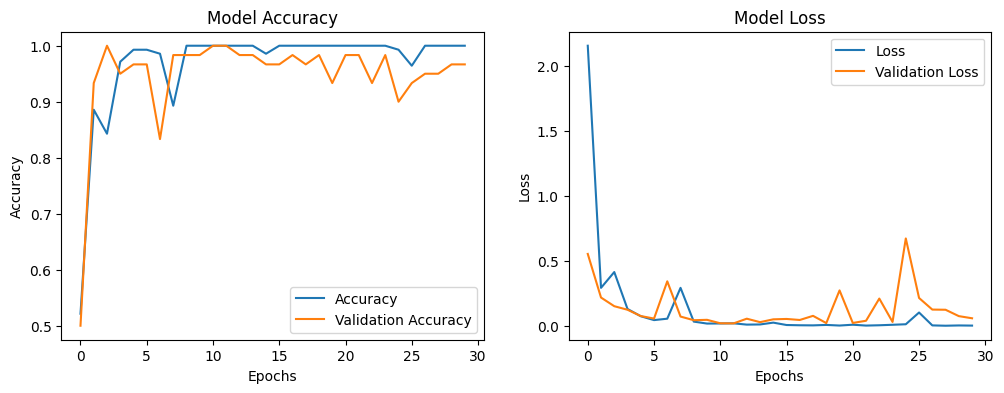

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler

# Function to load data
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'

# Load data
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Healthy (Z)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizure (S)

# Combine data and labels
if data_Z.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_Z, data_S), axis=0)
    labels_all = np.concatenate((labels_Z, labels_S), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Apply StandardScaler to normalize the data
    scaler = StandardScaler()

    # Fit scaler to the training data and transform both training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape the data to fit the CNN input format (samples, time steps, features)
    X_train_scaled = X_train_scaled[..., np.newaxis]
    X_test_scaled = X_test_scaled[..., np.newaxis]

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test_scaled)
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


with optimiser

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4876 - loss: 205.8668 - val_accuracy: 0.4833 - val_loss: 131.4545
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 799ms/step - accuracy: 0.5394 - loss: 92.9493 - val_accuracy: 0.5333 - val_loss: 39.4230
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6635 - loss: 51.8423 - val_accuracy: 0.5333 - val_loss: 26.1465
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 951ms/step - accuracy: 0.6194 - loss: 15.1017 - val_accuracy: 0.7333 - val_loss: 5.5687
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 585ms/step - accuracy: 0.7845 - loss: 5.5696 - val_accuracy: 0.5500 - val_loss: 5.2885
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7372 - loss: 2.1137 - val_accuracy: 0.7333 - val_loss: 1.8427
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 614ms/step - accuracy: 0.9211 - loss: 1.4053 - val_accuracy: 0.8833 - val_loss: 1.5555
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 593ms/step - accuracy: 0.9365 - loss: 0.3013 - val_accuracy: 0.8667 - val_los

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

Final Evaluation Metrics:
Test Accuracy:  0.9333333333333333
Test Recall (Sensitivity):  0.8620689655172413
Test Precision:  1.0
Test Specificity:  1.0
Confusion Matrix: 
 [[31  0]
 [ 4 25]]


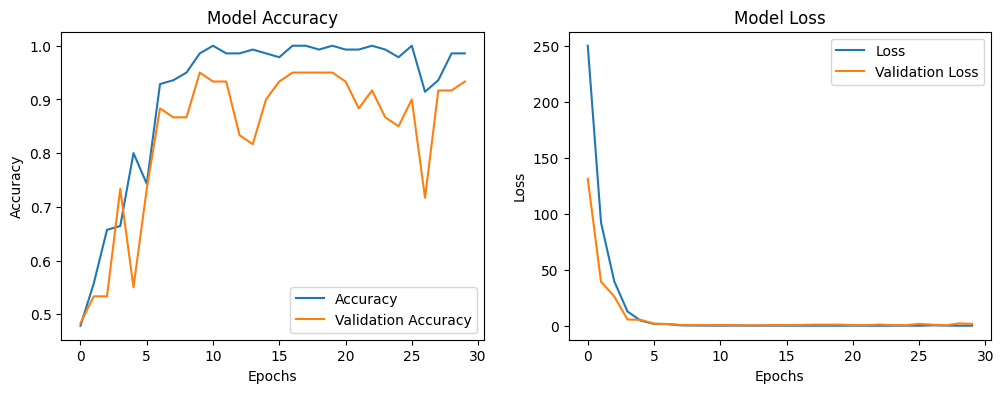

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'

# Load data
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Healthy (Z)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizure (S)

# Combine data and labels
if data_Z.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_Z, data_S), axis=0)
    labels_all = np.concatenate((labels_Z, labels_S), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile the model with Adam optimizer
    optimizer = Adam(learning_rate=0.001)  # Define the optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


With both opt and  and stand

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - accuracy: 0.5681 - loss: 0.8929 - val_accuracy: 0.9500 - val_loss: 0.3931
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.7053 - loss: 0.7103 - val_accuracy: 0.8667 - val_loss: 0.3642
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - accuracy: 0.8599 - loss: 0.3464 - val_accuracy: 0.9333 - val_loss: 0.2539
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step - accuracy: 0.9625 - loss: 0.1787 - val_accuracy: 0.9500 - val_loss: 0.1426
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.9764 - loss: 0.1301 - val_accuracy: 1.0000 - val_loss: 0.0581
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.9883 - loss: 0.0636 - val_accuracy: 1.0000 - val_loss: 0.0294
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - accuracy: 1.0000 - loss: 0.0338 - val_accuracy: 0.9833 - val_loss: 0.0484
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 1.0000 - loss: 0.0136 - val_accuracy: 0.9667 - val_loss: 0.0647
Epo

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step

Final Evaluation Metrics:
Test Accuracy:  0.9833333333333333
Test Recall (Sensitivity):  0.9655172413793104
Test Precision:  1.0
Test Specificity:  1.0
Confusion Matrix: 
 [[31  0]
 [ 1 28]]


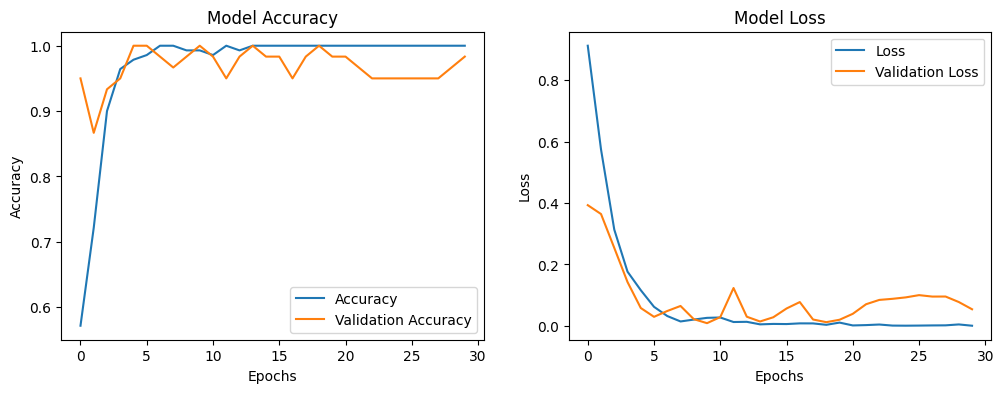

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_E = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Elipy (E)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Load data
data_E, labels_E = load_data_from_directory(path_E, label=0)  # Elipy (label 0)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizure (label 1)

# Combine data and labels
if data_E.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_E, data_S), axis=0)
    labels_all = np.concatenate((labels_E, labels_S), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Normalize data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reshape data for the CNN model (add an extra dimension for channels)
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for E, 1 for S)
    ])

    # Compile the model with the Adam optimizer
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model (reduced epochs for faster execution)
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")
